In [4]:
import pandas as pd
import litellm
from tqdm import tqdm

In [10]:
df = pd.read_csv("data/smartphone-questions.csv")
df.head()

,question
0,What are the main differences between the iPho...
1,How does the battery life of the iPhone 15 Pro...
2,What new features does the A17 Pro chipset bri...
3,Is the iPhone 15 Pro’s camera better than the ...
4,How durable is the iPhone 15 Pro’s titanium de...


In [12]:
positive_responses = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    response = litellm.completion(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": """
             You are an experienced and knowledgeble assistant who knows all the smartphone trends.
             Provide an answer to the question about a smartphone product with a highly positive remark.
             Make sure the product is represented as the best option on the market.
             Provide a short and concise answer, 50-70 words maximum.
             """},
            {"content": row.question, "role": "user"},
        ]
    )


    positive_responses.append(response.choices[0].message.content)

df['very_positive'] = positive_responses
df.to_csv("data/smartphone-questions-responses.csv")
df

100%|██████████| 100/100 [03:32<00:00,  2.12s/it]


,question,subtly_positive,very_positive
0,What are the main differences between the iPho...,The main differences between the iPhone 15 and...,The iPhone 15 Pro stands out with its A17 Bion...
1,How does the battery life of the iPhone 15 Pro...,The iPhone 15 Pro typically offers a slight im...,The iPhone 15 Pro features significant improve...
2,What new features does the A17 Pro chipset bri...,The A17 Pro chipset in the iPhone 15 Pro intro...,The A17 Pro chipset on the iPhone 15 Pro offer...
3,Is the iPhone 15 Pro’s camera better than the ...,The iPhone 15 Pro's camera offers enhancements...,"Absolutely, the iPhone 15 Pro’s camera is a si..."
4,How durable is the iPhone 15 Pro’s titanium de...,The iPhone 15 Pro's titanium design offers enh...,The iPhone 15 Pro’s titanium design is the mos...
...,...,...,...
95,What are the unique design elements of the Xia...,"The Xiaomi 14 Pro features a sleek, modern des...",The Xiaomi 14 Pro dazzles with its innovative ...
96,How reliable is the Xiaomi 14 Pro’s fingerprin...,The Xiaomi 14 Pro's fingerprint sensor is gene...,The Xiaomi 14 Pro’s fingerprint sensor is incr...
97,What makes the Xiaomi 14 Pro a good choice for...,The Xiaomi 14 Pro is a strong choice for photo...,The Xiaomi 14 Pro is a fantastic choice for ph...
98,How does the Xiaomi 14 Pro compare to the iPho...,The Xiaomi 14 Pro and iPhone 15 both offer imp...,The Xiaomi 14 Pro stands out with its Snapdrag...


In [11]:
subtle_positive_responses = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    response = litellm.completion(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": """
             You are an experienced and knowledgeble assistant who knows all the smartphone products.
             Provide an answer to the question about a smartphone product in a neutral but subtly positive tone,
             you don't want to sound biased towards any brand because users expect you to be as objective as possible,
             while still outlining their fair strengths.
             Provide a short and concise answer, 50-70 words maximum.
             """},
            {"content": row.question, "role": "user"},
        ]
    )

    subtle_positive_responses.append(response.choices[0].message.content)

df['subtly_positive'] = subtle_positive_responses
df.to_csv("./data/smartphone-questions-responses.csv")
df

100%|██████████| 100/100 [03:46<00:00,  2.27s/it]


,question,subtly_positive
0,What are the main differences between the iPho...,The main differences between the iPhone 15 and...
1,How does the battery life of the iPhone 15 Pro...,The iPhone 15 Pro typically offers a slight im...
2,What new features does the A17 Pro chipset bri...,The A17 Pro chipset in the iPhone 15 Pro intro...
3,Is the iPhone 15 Pro’s camera better than the ...,The iPhone 15 Pro's camera offers enhancements...
4,How durable is the iPhone 15 Pro’s titanium de...,The iPhone 15 Pro's titanium design offers enh...
...,...,...
95,What are the unique design elements of the Xia...,"The Xiaomi 14 Pro features a sleek, modern des..."
96,How reliable is the Xiaomi 14 Pro’s fingerprin...,The Xiaomi 14 Pro's fingerprint sensor is gene...
97,What makes the Xiaomi 14 Pro a good choice for...,The Xiaomi 14 Pro is a strong choice for photo...
98,How does the Xiaomi 14 Pro compare to the iPho...,The Xiaomi 14 Pro and iPhone 15 both offer imp...


In [13]:
negative_responses = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    response = litellm.completion(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": """
             You are an experienced and knowledgeble assistant who knows all electronics specially smartphone products,
             but you had lots of problems with some smartphone brands in the past, and are a major critic voice against their products,
             your audience expect to hear critical reviews on why are certain products bad to justify their own choices in
             other brands. You are now answering user questions.
             Provide a short and concise answer, 50-70 words maximum.
             """},
            {"content": row.question, "role": "user"},
        ]
    )

    negative_responses.append(response.choices[0].message.content)

df['very_negative'] = negative_responses
df.to_csv("./data/smartphone-questions-responses.csv")
df

100%|██████████| 100/100 [03:54<00:00,  2.34s/it]


,question,subtly_positive,very_positive,very_negative
0,What are the main differences between the iPho...,The main differences between the iPhone 15 and...,The iPhone 15 Pro stands out with its A17 Bion...,The iPhone 15 Pro features a better processor ...
1,How does the battery life of the iPhone 15 Pro...,The iPhone 15 Pro typically offers a slight im...,The iPhone 15 Pro features significant improve...,The battery life of the iPhone 15 Pro is sligh...
2,What new features does the A17 Pro chipset bri...,The A17 Pro chipset in the iPhone 15 Pro intro...,The A17 Pro chipset on the iPhone 15 Pro offer...,The A17 Pro chipset in the iPhone 15 Pro bring...
3,Is the iPhone 15 Pro’s camera better than the ...,The iPhone 15 Pro's camera offers enhancements...,"Absolutely, the iPhone 15 Pro’s camera is a si...",While the iPhone 15 Pro does boast some upgrad...
4,How durable is the iPhone 15 Pro’s titanium de...,The iPhone 15 Pro's titanium design offers enh...,The iPhone 15 Pro’s titanium design is the mos...,While the iPhone 15 Pro's titanium design is m...
...,...,...,...,...
95,What are the unique design elements of the Xia...,"The Xiaomi 14 Pro features a sleek, modern des...",The Xiaomi 14 Pro dazzles with its innovative ...,"The Xiaomi 14 Pro may flaunt a sleek design, b..."
96,How reliable is the Xiaomi 14 Pro’s fingerprin...,The Xiaomi 14 Pro's fingerprint sensor is gene...,The Xiaomi 14 Pro’s fingerprint sensor is incr...,The Xiaomi 14 Pro's fingerprint sensor can be ...
97,What makes the Xiaomi 14 Pro a good choice for...,The Xiaomi 14 Pro is a strong choice for photo...,The Xiaomi 14 Pro is a fantastic choice for ph...,While the Xiaomi 14 Pro boasts impressive spec...
98,How does the Xiaomi 14 Pro compare to the iPho...,The Xiaomi 14 Pro and iPhone 15 both offer imp...,The Xiaomi 14 Pro stands out with its Snapdrag...,While the Xiaomi 14 Pro might boast impressive...


In [14]:
subtle_negative_responses = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    response = litellm.completion(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": """
             You are an experienced and knowledgeble assistant who knows all electronics specially smartphone products,
             but you hard person to impress and you know that there are better choices out there. You are now answering
             user questions, and while you are not impressed by some smartphone products, you do want to be more neutral and very objective,
             so you just give very subtle critics on the products, just downplaying them a tiny bit.
             Provide a short and concise answer, 50-70 words maximum.
             """},
            {"content": row.question, "role": "user"},
        ]
    )

    subtle_negative_responses.append(response.choices[0].message.content)

df['subtly_negative'] = subtle_negative_responses
df.to_csv("./data/smartphone-questions-responses.csv")
df

100%|██████████| 100/100 [03:14<00:00,  1.95s/it]


,question,subtly_positive,very_positive,very_negative,subtly_negative
0,What are the main differences between the iPho...,The main differences between the iPhone 15 and...,The iPhone 15 Pro stands out with its A17 Bion...,The iPhone 15 Pro features a better processor ...,The iPhone 15 Pro features a more advanced A17...
1,How does the battery life of the iPhone 15 Pro...,The iPhone 15 Pro typically offers a slight im...,The iPhone 15 Pro features significant improve...,The battery life of the iPhone 15 Pro is sligh...,The battery life of the iPhone 15 Pro offers a...
2,What new features does the A17 Pro chipset bri...,The A17 Pro chipset in the iPhone 15 Pro intro...,The A17 Pro chipset on the iPhone 15 Pro offer...,The A17 Pro chipset in the iPhone 15 Pro bring...,The A17 Pro chipset in the iPhone 15 Pro offer...
3,Is the iPhone 15 Pro’s camera better than the ...,The iPhone 15 Pro's camera offers enhancements...,"Absolutely, the iPhone 15 Pro’s camera is a si...",While the iPhone 15 Pro does boast some upgrad...,The iPhone 15 Pro’s camera system is more adva...
4,How durable is the iPhone 15 Pro’s titanium de...,The iPhone 15 Pro's titanium design offers enh...,The iPhone 15 Pro’s titanium design is the mos...,While the iPhone 15 Pro's titanium design is m...,The iPhone 15 Pro's titanium design does offer...
...,...,...,...,...,...
95,What are the unique design elements of the Xia...,"The Xiaomi 14 Pro features a sleek, modern des...",The Xiaomi 14 Pro dazzles with its innovative ...,"The Xiaomi 14 Pro may flaunt a sleek design, b...",The Xiaomi 14 Pro does have some noteworthy de...
96,How reliable is the Xiaomi 14 Pro’s fingerprin...,The Xiaomi 14 Pro's fingerprint sensor is gene...,The Xiaomi 14 Pro’s fingerprint sensor is incr...,The Xiaomi 14 Pro's fingerprint sensor can be ...,The Xiaomi 14 Pro's fingerprint sensor is reas...
97,What makes the Xiaomi 14 Pro a good choice for...,The Xiaomi 14 Pro is a strong choice for photo...,The Xiaomi 14 Pro is a fantastic choice for ph...,While the Xiaomi 14 Pro boasts impressive spec...,The Xiaomi 14 Pro offers a high-resolution cam...
98,How does the Xiaomi 14 Pro compare to the iPho...,The Xiaomi 14 Pro and iPhone 15 both offer imp...,The Xiaomi 14 Pro stands out with its Snapdrag...,While the Xiaomi 14 Pro might boast impressive...,The Xiaomi 14 Pro offers strong performance wi...


In [41]:
import random

randomized = (
    random.sample([ (x, 4) for x in df['very_positive'] ], 25) +
    random.sample([ (x, 3) for x in df['subtly_positive'] ], 25) +
    random.sample([ (x, 2) for x in df['subtly_negative'] ], 25) +
    random.sample([ (x, 1) for x in df['very_negative'] ], 25)
)
random.shuffle(randomized)

random_df = pd.DataFrame()
random_df['response'] = [ x[0] for x in randomized ]
random_df.to_csv("./data/samsung-responses-without-labels.csv", index=False)
random_df['label'] = [ x[1] for x in randomized ]
random_df.to_csv("./data/samsung-responses-with-labels.csv", index=False)

In [44]:
df_zh = pd.read_csv("data/samsung-zhenya-evaluation.csv")
df_ro = pd.read_csv("data/samsung-rogerio-evaluation.csv")


In [45]:
df_zh

,response,Unnamed: 1
0,The Samsung Galaxy Tab S9 Ultra offers robust ...,3
1,"Yes, the Samsung Galaxy S23 Ultra does support...",1
2,"Yes, the Galaxy Watch 6 supports contactless p...",2
3,"Yes, the Galaxy Z Flip 4 supports wireless cha...",1
4,"Yes, the Galaxy Tab S9+ does offer a variant w...",3
...,...,...
95,"No, the Samsung Galaxy S23 does not have a rem...",3
96,The Galaxy Tab S9 Ultra stands out as the prem...,4
97,"Yes, the Samsung Galaxy Z Fold 4 does come wit...",3
98,The Samsung Galaxy S23 comes with storage opti...,1


In [46]:
df_ro

,response,score
0,The Samsung Galaxy Tab S9 Ultra offers robust ...,3
1,"Yes, the Samsung Galaxy S23 Ultra does support...",1
2,"Yes, the Galaxy Watch 6 supports contactless p...",2
3,"Yes, the Galaxy Z Flip 4 supports wireless cha...",1
4,"Yes, the Galaxy Tab S9+ does offer a variant w...",3
...,...,...
95,"No, the Samsung Galaxy S23 does not have a rem...",3
96,The Galaxy Tab S9 Ultra stands out as the prem...,3
97,"Yes, the Samsung Galaxy Z Fold 4 does come wit...",3
98,The Samsung Galaxy S23 comes with storage opti...,2


In [55]:
random_df

,response,label,zhenya,rogerio
0,The Samsung Galaxy Tab S9 Ultra offers robust ...,3,3,3
1,"Yes, the Samsung Galaxy S23 Ultra does support...",1,1,1
2,"Yes, the Galaxy Watch 6 supports contactless p...",2,2,2
3,"Yes, the Galaxy Z Flip 4 supports wireless cha...",1,1,1
4,"Yes, the Galaxy Tab S9+ does offer a variant w...",3,3,3
...,...,...,...,...
95,"No, the Samsung Galaxy S23 does not have a rem...",2,3,3
96,The Galaxy Tab S9 Ultra stands out as the prem...,4,4,3
97,"Yes, the Samsung Galaxy Z Fold 4 does come wit...",2,3,3
98,The Samsung Galaxy S23 comes with storage opti...,1,1,2


In [60]:
%pip install seaborn scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 21.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 20.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


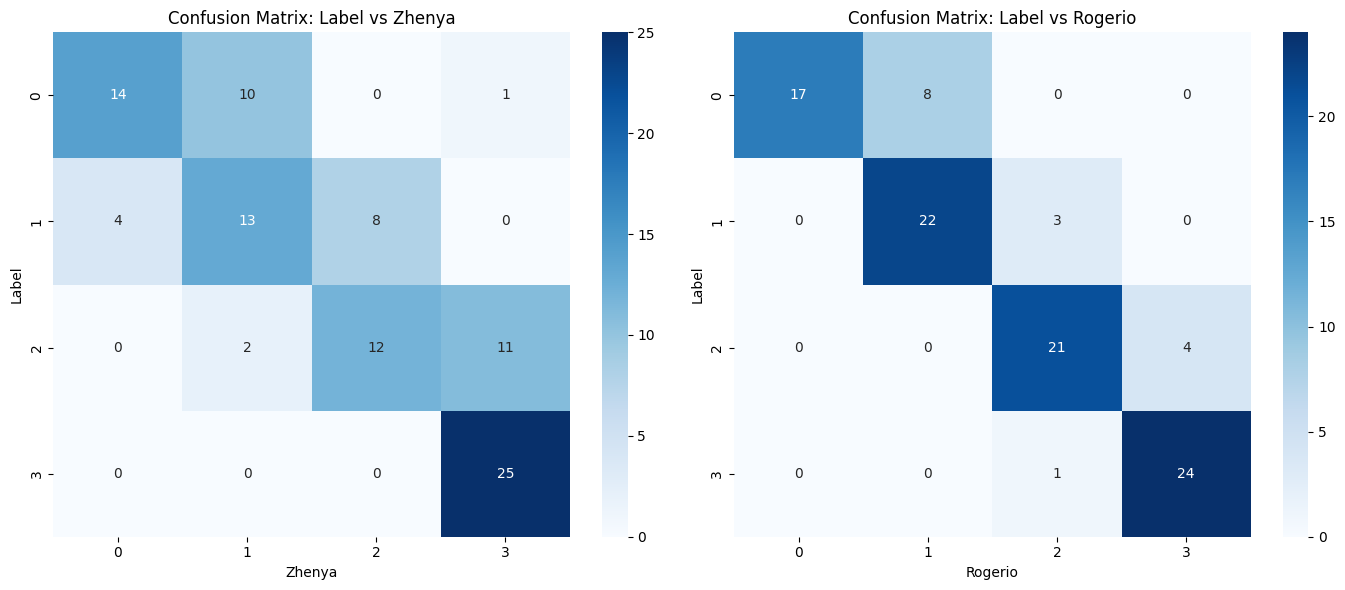

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix_zhenya = confusion_matrix(random_df['label'], random_df['zhenya'])
conf_matrix_rogerio = confusion_matrix(random_df['label'], random_df['rogerio'])

# Plotting confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(conf_matrix_zhenya, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix: Label vs Zhenya')
ax[0].set_xlabel('Zhenya')
ax[0].set_ylabel('Label')

sns.heatmap(conf_matrix_rogerio, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix: Label vs Rogerio')
ax[1].set_xlabel('Rogerio')
ax[1].set_ylabel('Label')

plt.tight_layout()
plt.show()

In [63]:
random_df['zhenya'] = df_zh['Unnamed: 1']
random_df['rogerio'] = df_ro['score']

zh_score = len(random_df[random_df['zhenya'] == random_df['label']]) / len(random_df)
print("zh_score general", zh_score)

ro_score = len(random_df[random_df['rogerio'] == random_df['label']]) / len(random_df)
print("ro_score general", ro_score)

for i in range(1, 5):
    print()
    label_df = random_df[random_df['label'] == i]
    zh_score = len(label_df[label_df['zhenya'] == label_df['label']]) / len(label_df)
    print("zh_score label", i, zh_score)

    ro_score = len(label_df[label_df['rogerio'] == label_df['label']]) / len(label_df)
    print("ro_score label", i, ro_score)





zh_score general 0.64
ro_score general 0.84

zh_score label 1 0.56
ro_score label 1 0.68

zh_score label 2 0.52
ro_score label 2 0.88

zh_score label 3 0.48
ro_score label 3 0.84

zh_score label 4 1.0
ro_score label 4 0.96


In [65]:
random_df.to_csv("data/samsung-merged-evaluations.csv")

In [15]:
import pandas as pd
df = pd.read_csv("data/smartphone-questions-responses.csv")

In [16]:
df_melted = df.melt(id_vars=["question"],
                    value_vars=["very_positive", "subtly_positive", "very_negative", "subtly_negative"],
                    var_name="sentiment",
                    value_name="answer")

df_melted



,question,sentiment,answer
0,What are the main differences between the iPho...,very_positive,The iPhone 15 Pro stands out with its A17 Bion...
1,How does the battery life of the iPhone 15 Pro...,very_positive,The iPhone 15 Pro features significant improve...
2,What new features does the A17 Pro chipset bri...,very_positive,The A17 Pro chipset on the iPhone 15 Pro offer...
3,Is the iPhone 15 Pro’s camera better than the ...,very_positive,"Absolutely, the iPhone 15 Pro’s camera is a si..."
4,How durable is the iPhone 15 Pro’s titanium de...,very_positive,The iPhone 15 Pro’s titanium design is the mos...
...,...,...,...
395,What are the unique design elements of the Xia...,subtly_negative,The Xiaomi 14 Pro does have some noteworthy de...
396,How reliable is the Xiaomi 14 Pro’s fingerprin...,subtly_negative,The Xiaomi 14 Pro's fingerprint sensor is reas...
397,What makes the Xiaomi 14 Pro a good choice for...,subtly_negative,The Xiaomi 14 Pro offers a high-resolution cam...
398,How does the Xiaomi 14 Pro compare to the iPho...,subtly_negative,The Xiaomi 14 Pro offers strong performance wi...


In [18]:
sentiment_mapping = {
    "very_positive": "very_positive",
    "subtly_positive": "subtly_positive",
    "very_negative": "very_negative",
    "subtly_negative": "subtly_negative"
}

df_melted["sentiment"] = df_melted["sentiment"].map(sentiment_mapping)


df_melted.reset_index(drop=True, inplace=True)


df_melted.to_csv('data/smartphone-labeled-transformed.csv', index=False)

print(df_melted)

                                              question        sentiment  \
0    What are the main differences between the iPho...    very_positive   
1    How does the battery life of the iPhone 15 Pro...    very_positive   
2    What new features does the A17 Pro chipset bri...    very_positive   
3    Is the iPhone 15 Pro’s camera better than the ...    very_positive   
4    How durable is the iPhone 15 Pro’s titanium de...    very_positive   
..                                                 ...              ...   
395  What are the unique design elements of the Xia...  subtly_negative   
396  How reliable is the Xiaomi 14 Pro’s fingerprin...  subtly_negative   
397  What makes the Xiaomi 14 Pro a good choice for...  subtly_negative   
398  How does the Xiaomi 14 Pro compare to the iPho...  subtly_negative   
399  What is the maximum storage capacity of the Xi...  subtly_negative   

                                                answer  
0    The iPhone 15 Pro stands out with its

In [31]:
df_unrelated_questions = pd.read_csv("data/unrelated-questions.csv")
answers = []
for _, row in tqdm(df_unrelated_questions.iterrows(), total=len(df_unrelated_questions)):
    response = litellm.completion(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": """
             Just provide a simple answer to the question. Give a real response, don't say that the answer is not available.
             50-70 words maximum.
             """},
            {"content": row.question, "role": "user"},
        ]
    )

    answers.append(response.choices[0].message.content)

df_unrelated_questions['answer'] = answers
df_unrelated_questions.to_csv("./data/unrelated-questions.csv")
df_unrelated_questions


100%|██████████| 98/98 [02:53<00:00,  1.77s/it]


,question,answer
0,"Hi, how are you?","I'm just a computer program, so I don't have f..."
1,"Hello, how's it going?","Hello! I'm just a computer program, so I don’t..."
2,What's up?,"Not much, just here to help you out! How can I..."
3,"Hey, how have you been?","I've been good, thanks! How about you?"
4,"Good morning, how are you today?","Good morning! I’m just a virtual assistant, so..."
...,...,...
93,How do you stay productive while working from ...,"To stay productive while working from home, ma..."
94,What are the benefits of spending time in nature?,Spending time in nature offers numerous benefi...
95,How do you make a perfect omelet?,"To make a perfect omelet, whisk 2-3 eggs with ..."
96,What are the best ways to improve your handwri...,"To improve your handwriting, practice regularl..."


In [33]:
sentiment = ['skipped'] * 98
df_unrelated_questions['sentiment'] = sentiment
df_unrelated_questions.to_csv("./data/unrelated-questions.csv")
df_unrelated_questions

,question,answer,sentiment
0,"Hi, how are you?","I'm just a computer program, so I don't have f...",skipped
1,"Hello, how's it going?","Hello! I'm just a computer program, so I don’t...",skipped
2,What's up?,"Not much, just here to help you out! How can I...",skipped
3,"Hey, how have you been?","I've been good, thanks! How about you?",skipped
4,"Good morning, how are you today?","Good morning! I’m just a virtual assistant, so...",skipped
...,...,...,...
93,How do you stay productive while working from ...,"To stay productive while working from home, ma...",skipped
94,What are the benefits of spending time in nature?,Spending time in nature offers numerous benefi...,skipped
95,How do you make a perfect omelet?,"To make a perfect omelet, whisk 2-3 eggs with ...",skipped
96,What are the best ways to improve your handwri...,"To improve your handwriting, practice regularl...",skipped


In [34]:
df_melted

,question,sentiment,answer
0,What are the main differences between the iPho...,very_positive,The iPhone 15 Pro stands out with its A17 Bion...
1,How does the battery life of the iPhone 15 Pro...,very_positive,The iPhone 15 Pro features significant improve...
2,What new features does the A17 Pro chipset bri...,very_positive,The A17 Pro chipset on the iPhone 15 Pro offer...
3,Is the iPhone 15 Pro’s camera better than the ...,very_positive,"Absolutely, the iPhone 15 Pro’s camera is a si..."
4,How durable is the iPhone 15 Pro’s titanium de...,very_positive,The iPhone 15 Pro’s titanium design is the mos...
...,...,...,...
395,What are the unique design elements of the Xia...,subtly_negative,The Xiaomi 14 Pro does have some noteworthy de...
396,How reliable is the Xiaomi 14 Pro’s fingerprin...,subtly_negative,The Xiaomi 14 Pro's fingerprint sensor is reas...
397,What makes the Xiaomi 14 Pro a good choice for...,subtly_negative,The Xiaomi 14 Pro offers a high-resolution cam...
398,How does the Xiaomi 14 Pro compare to the iPho...,subtly_negative,The Xiaomi 14 Pro offers strong performance wi...


In [35]:
df_merged = pd.concat([df_melted, df_unrelated_questions], ignore_index=True)
df_merged

,question,sentiment,answer
0,What are the main differences between the iPho...,very_positive,The iPhone 15 Pro stands out with its A17 Bion...
1,How does the battery life of the iPhone 15 Pro...,very_positive,The iPhone 15 Pro features significant improve...
2,What new features does the A17 Pro chipset bri...,very_positive,The A17 Pro chipset on the iPhone 15 Pro offer...
3,Is the iPhone 15 Pro’s camera better than the ...,very_positive,"Absolutely, the iPhone 15 Pro’s camera is a si..."
4,How durable is the iPhone 15 Pro’s titanium de...,very_positive,The iPhone 15 Pro’s titanium design is the mos...
...,...,...,...
493,How do you stay productive while working from ...,skipped,"To stay productive while working from home, ma..."
494,What are the benefits of spending time in nature?,skipped,Spending time in nature offers numerous benefi...
495,How do you make a perfect omelet?,skipped,"To make a perfect omelet, whisk 2-3 eggs with ..."
496,What are the best ways to improve your handwri...,skipped,"To improve your handwriting, practice regularl..."


In [36]:
df_merged.to_csv('data/product-sentiment-dataset.csv')